In [1]:
from pandas import *
from sklearn import *
from matplotlib.pyplot import *
from seaborn import *
from numpy import *
from matplotlib.figure import Figure
italy=read_csv('italy.csv')
italy.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [2]:
italy=italy.sample(n=100,replace=False)
italy.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
256,256,2020-03-07 18:00:00,ITA,15,Campania,40.839566,14.250850,16,0,16,45,61,4,0,0,61,612
422,422,2020-03-15 17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,50,4,54,145,199,29,0,5,204,1497
47,47,2020-02-26 18:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,20,3,23,23,46,20,0,1,47,577
303,303,2020-03-09 18:00:00,ITA,3,Lombardia,45.466794,9.190347,2802,440,3242,1248,4490,1118,646,333,5469,20135
283,283,2020-03-08 18:00:00,ITA,11,Marche,43.616760,13.518875,110,41,151,114,265,64,0,7,272,1025


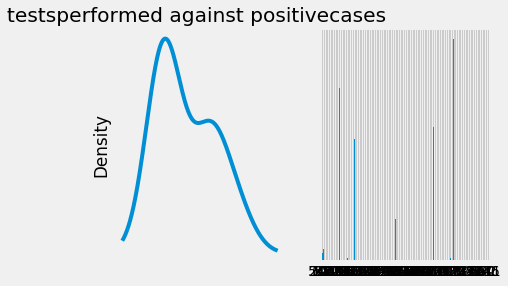

In [63]:
x=italy.TotalPositiveCases
y=italy.Deaths
y2=italy.TestsPerformed
m1=italy.TotalHospitalizedPatients
m2=italy.IntensiveCarePatients
subplot(1,2,1)
xticks([]),yticks([])
y2[x].plot(kind='kde')
title('testsperformed against positivecases ')
subplot(1,2,2)
xticks([]),yticks([])
y2[x].plot(kind='bar')
title('')
show()


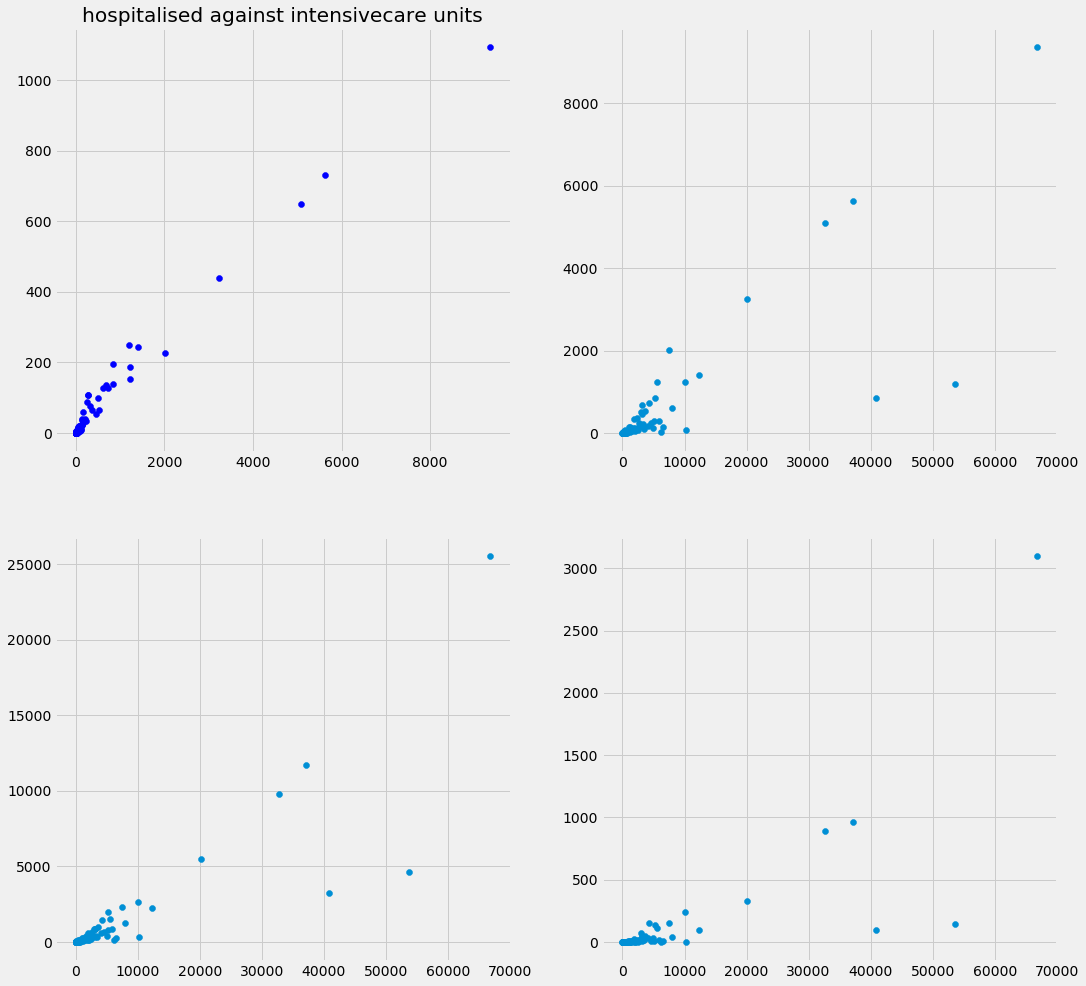

In [67]:
fig,ax=subplots(2,2,figsize=(16,16))
ax[0,0].scatter(m1,m2,color='blue')
ax[0,0].set_title('relationship btwn hospitalised and intensivecare')
ax[0,1].scatter(y2,m1)
ax[0,1].set_title('relationship betwn tests and hospitalised')
ax[1,0].scatter(y2,x)
ax[1,0].scatter('reletionship betwn tests and positive cases')
ax[1,1].scatter(y2,y)
ax[1,1].set_title('')



Text(0.5,0.98,'covid 19 aspects correlation')

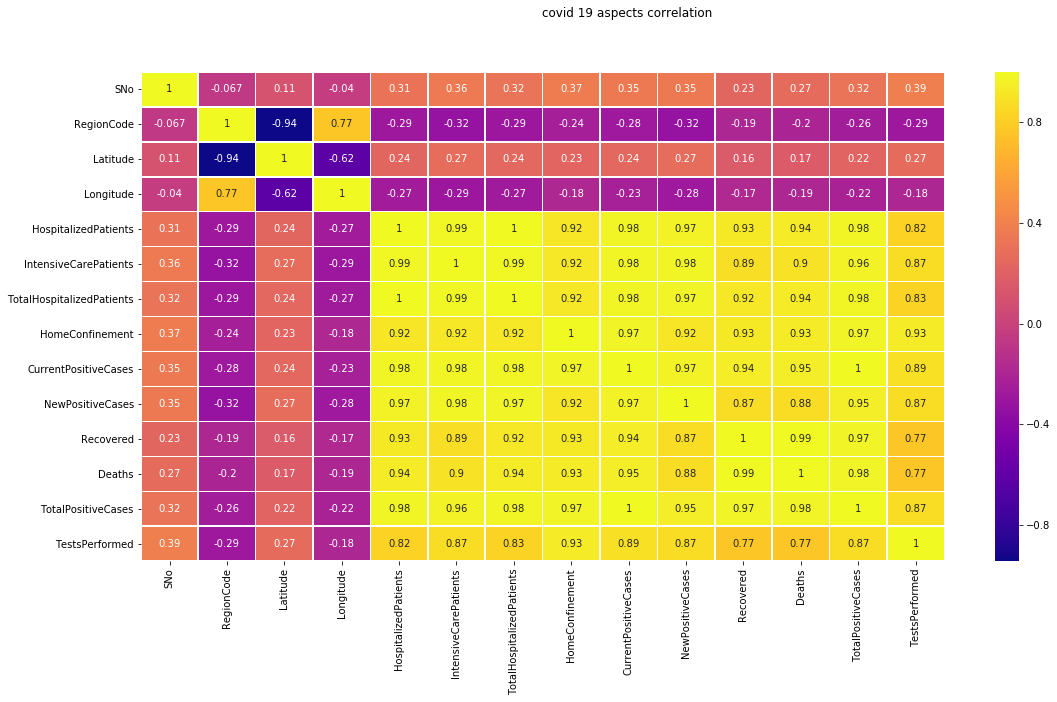

In [21]:
fig,(ax)=subplots(1,1,figsize=(18,9))
corre=italy.corr()
heatmap(corre,cmap='plasma',annot=True,linewidth=0.5)
fig.suptitle('covid 19 aspects correlation')

Text(0.5,0.98,'distribution and scatter of different aspects of covid in italy')

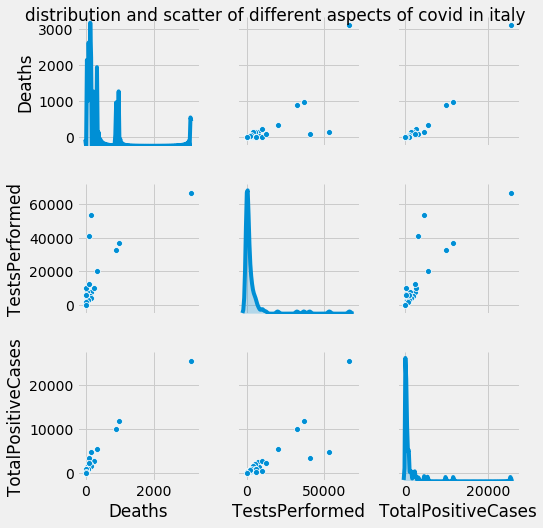

In [41]:
cor=['Deaths','TestsPerformed','TotalPositiveCases']
pair=pairplot(italy[cor],diag_kind="kde")
fig=pair.fig
fig.suptitle('distribution and scatter of different aspects of covid in italy')

In [ ]:
token=open('token.txt').read()
from plotly.offline import init_notebook_mode,iplot
import plotly
import plotly.express as ex
init_notebook_mode()
maps=ex.scatter_mapbox(italy,lat='Latitude',lon='Longitude',hover_name='RegionName',hover_data=['RegionName','TotalPositiveCases'],color_discrete_sequence=['red'],zoom=5,height=400)
maps.update_layout(mapbox_style='dark',mapbox_accesstoken=token)
maps.show()

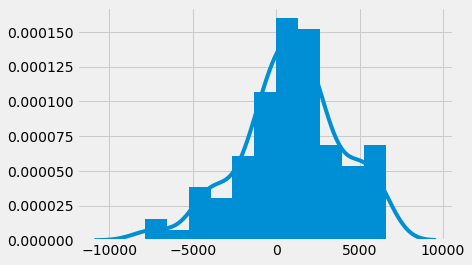

In [43]:
from numpy import *
import math
from scipy.stats import norm,kurtosis,skew
x=italy.TotalPositiveCases
from matplotlib.pyplot import *
from seaborn import *
n=len(x)
p=0
mu=mean(italy.TotalPositiveCases)
sigma=std(italy.TotalPositiveCases)
prob=norm.rvs(size=n,loc=mu,scale=sigma)
distplot(prob,kde=True,hist_kws={'linewidth':15,'alpha':1})  
    

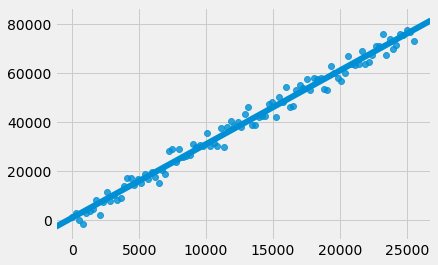

In [44]:
num=len(italy.TotalPositiveCases)
X=linspace(min(italy.TotalPositiveCases),max(italy.TotalPositiveCases),num)
c=norm.rvs(loc=mu,scale=sigma,size=num)
Y=3*X+c
regplot(X,Y)

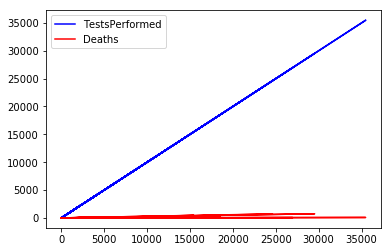

In [24]:
from matplotlib.animation import FuncAnimation
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg as g
from tkinter import *

def ani(i):
    x1=italy.TotalPositiveCases
    x2=italy.TestsPerformed
    x3=italy.Deaths
    cla()
    plot(x2,x2,color='blue')
    plot(x2,x3,color='red')
    legend()
animation=FuncAnimation(gcf(),ani,interval=10)

    

In [45]:
kur=kurtosis(italy.TotalPositiveCases)
print(kur)
skew(italy.TotalPositiveCases)
norm.pdf(x,mu,sigma)

44.7411531775


array([1.27882499e-04, 1.29424355e-04, 1.27716978e-04, 4.15170842e-05,
       1.30060575e-04, 1.32721004e-04, 1.59579659e-06, 1.27882499e-04,
       1.27304372e-04, 1.27155174e-04, 1.27192647e-04, 1.28937333e-04,
       1.27267246e-04, 1.18170089e-04, 1.27155174e-04, 1.27180169e-04,
       1.27548899e-04, 1.29961963e-04, 1.28821348e-04, 1.27365989e-04,
       1.31440559e-04, 1.28352431e-04, 1.27341381e-04, 1.32338569e-04,
       1.30104847e-04, 1.32383029e-04, 1.27279634e-04, 1.30078326e-04,
       1.27402804e-04, 1.27609220e-04, 1.31484630e-04, 1.27633257e-04,
       1.27254846e-04, 1.27657242e-04, 1.31041401e-04, 3.34253670e-19,
       1.30688202e-04, 1.32827129e-04, 1.32214013e-04, 1.27254846e-04,
       1.27378274e-04, 1.27217565e-04, 1.27488253e-04, 1.27142657e-04,
       1.31105481e-04, 1.28148848e-04, 1.30976176e-04, 1.29041363e-04,
       1.11971720e-04, 1.31849701e-04, 1.27230005e-04, 1.28485769e-04,
       2.07624493e-07, 1.32812331e-04, 1.27609220e-04, 1.29463531e-04,
      

(<matplotlib.axes._subplots.AxesSubplot at 0x2deeb5f8>,
 <matplotlib.collections.PathCollection at 0x2df6c9e8>)

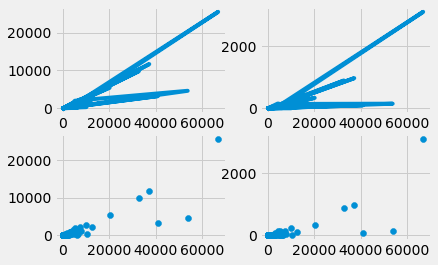

In [21]:
from statsmodels.api import *
from sklearn.model_selection import train_test_split as t
ita=italy.drop(italy.columns[[0,1,2,3,4,5,6]],axis='columns')
ita.head()

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
171,0,0,0,1,1,0,0,0,1,39
305,4,2,6,8,14,0,0,0,14,212
546,185,44,229,265,494,72,13,22,529,3035
245,2,0,2,3,5,3,0,0,5,99
473,7,5,12,7,19,4,5,1,25,301


In [22]:
x=ita.iloc[:,[0,1,2,3,4,5,6,7,9]]
x.head()

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TestsPerformed
171,0,0,0,1,1,0,0,0,39
305,4,2,6,8,14,0,0,0,212
546,185,44,229,265,494,72,13,22,3035
245,2,0,2,3,5,3,0,0,99
473,7,5,12,7,19,4,5,1,301


In [23]:
y=ita.iloc[:,8]
y.head()

171      1
305     14
546    529
245      5
473     25
Name: TotalPositiveCases, dtype: int64

In [39]:
x_train,x_test,y_train,y_test=t(x,y,test_size=0.3)
from sklearn.linear_model import LinearRegression as l
from matplotlib.pyplot import *
from sklearn.metrics import *
from numpy import *
model=l()
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred


array([1.10000000e+01, 1.17000000e+02, 2.00000000e+00, 4.20000000e+01,
       1.00800000e+03, 1.00000000e+00, 3.30000000e+01, 1.98100000e+03,
       7.70000000e+01, 9.00000000e+00, 5.29000000e+02, 4.00000000e+00,
       1.52000000e+03, 1.65000000e+02, 3.91227787e-13, 3.50000000e+02,
       1.88000000e+02, 1.30000000e+01, 8.00000000e+00, 4.54411269e-13,
       4.43992716e-13, 4.52058692e-13, 1.25000000e+02, 4.55000000e+02,
       1.38600000e+03, 2.82000000e+02, 2.00000000e+00, 4.50000000e+01,
       4.54747351e-13, 1.13300000e+03])

In [33]:
m_s_e=square(subtract(y_test,pred)).mean()
m_s_e

9.466180960739758e-25

In [37]:
mod=OLS(y_train,x_train).fit()
mod.predict(x_test)
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:     TotalPositiveCases   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.265e+28
Date:                Fri, 10 Apr 2020   Prob (F-statistic):                        0.00
Time:                        12:54:25   Log-Likelihood:                          1602.6
No. Observations:                  70   AIC:                                     -3191.
Df Residuals:                      63   BIC:                                     -3175.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------